# Chapter 10: K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

C:\Users\raj15\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Importing the dataset

In [3]:
dataset = pd.read_csv('heart.csv')
dataset.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the K-NN model on the Training set

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Predicting the Test set results

In [7]:
y_pred = classifier.predict(X_test)

## Evaluation

In [8]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
from sklearn.metrics import confusion_matrix, classification_report
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[12 21]
 [15 28]]


              precision    recall  f1-score   support

           0       0.44      0.36      0.40        33
           1       0.57      0.65      0.61        43

    accuracy                           0.53        76
   macro avg       0.51      0.51      0.50        76
weighted avg       0.52      0.53      0.52        76



## Choosing a K Value

In [9]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

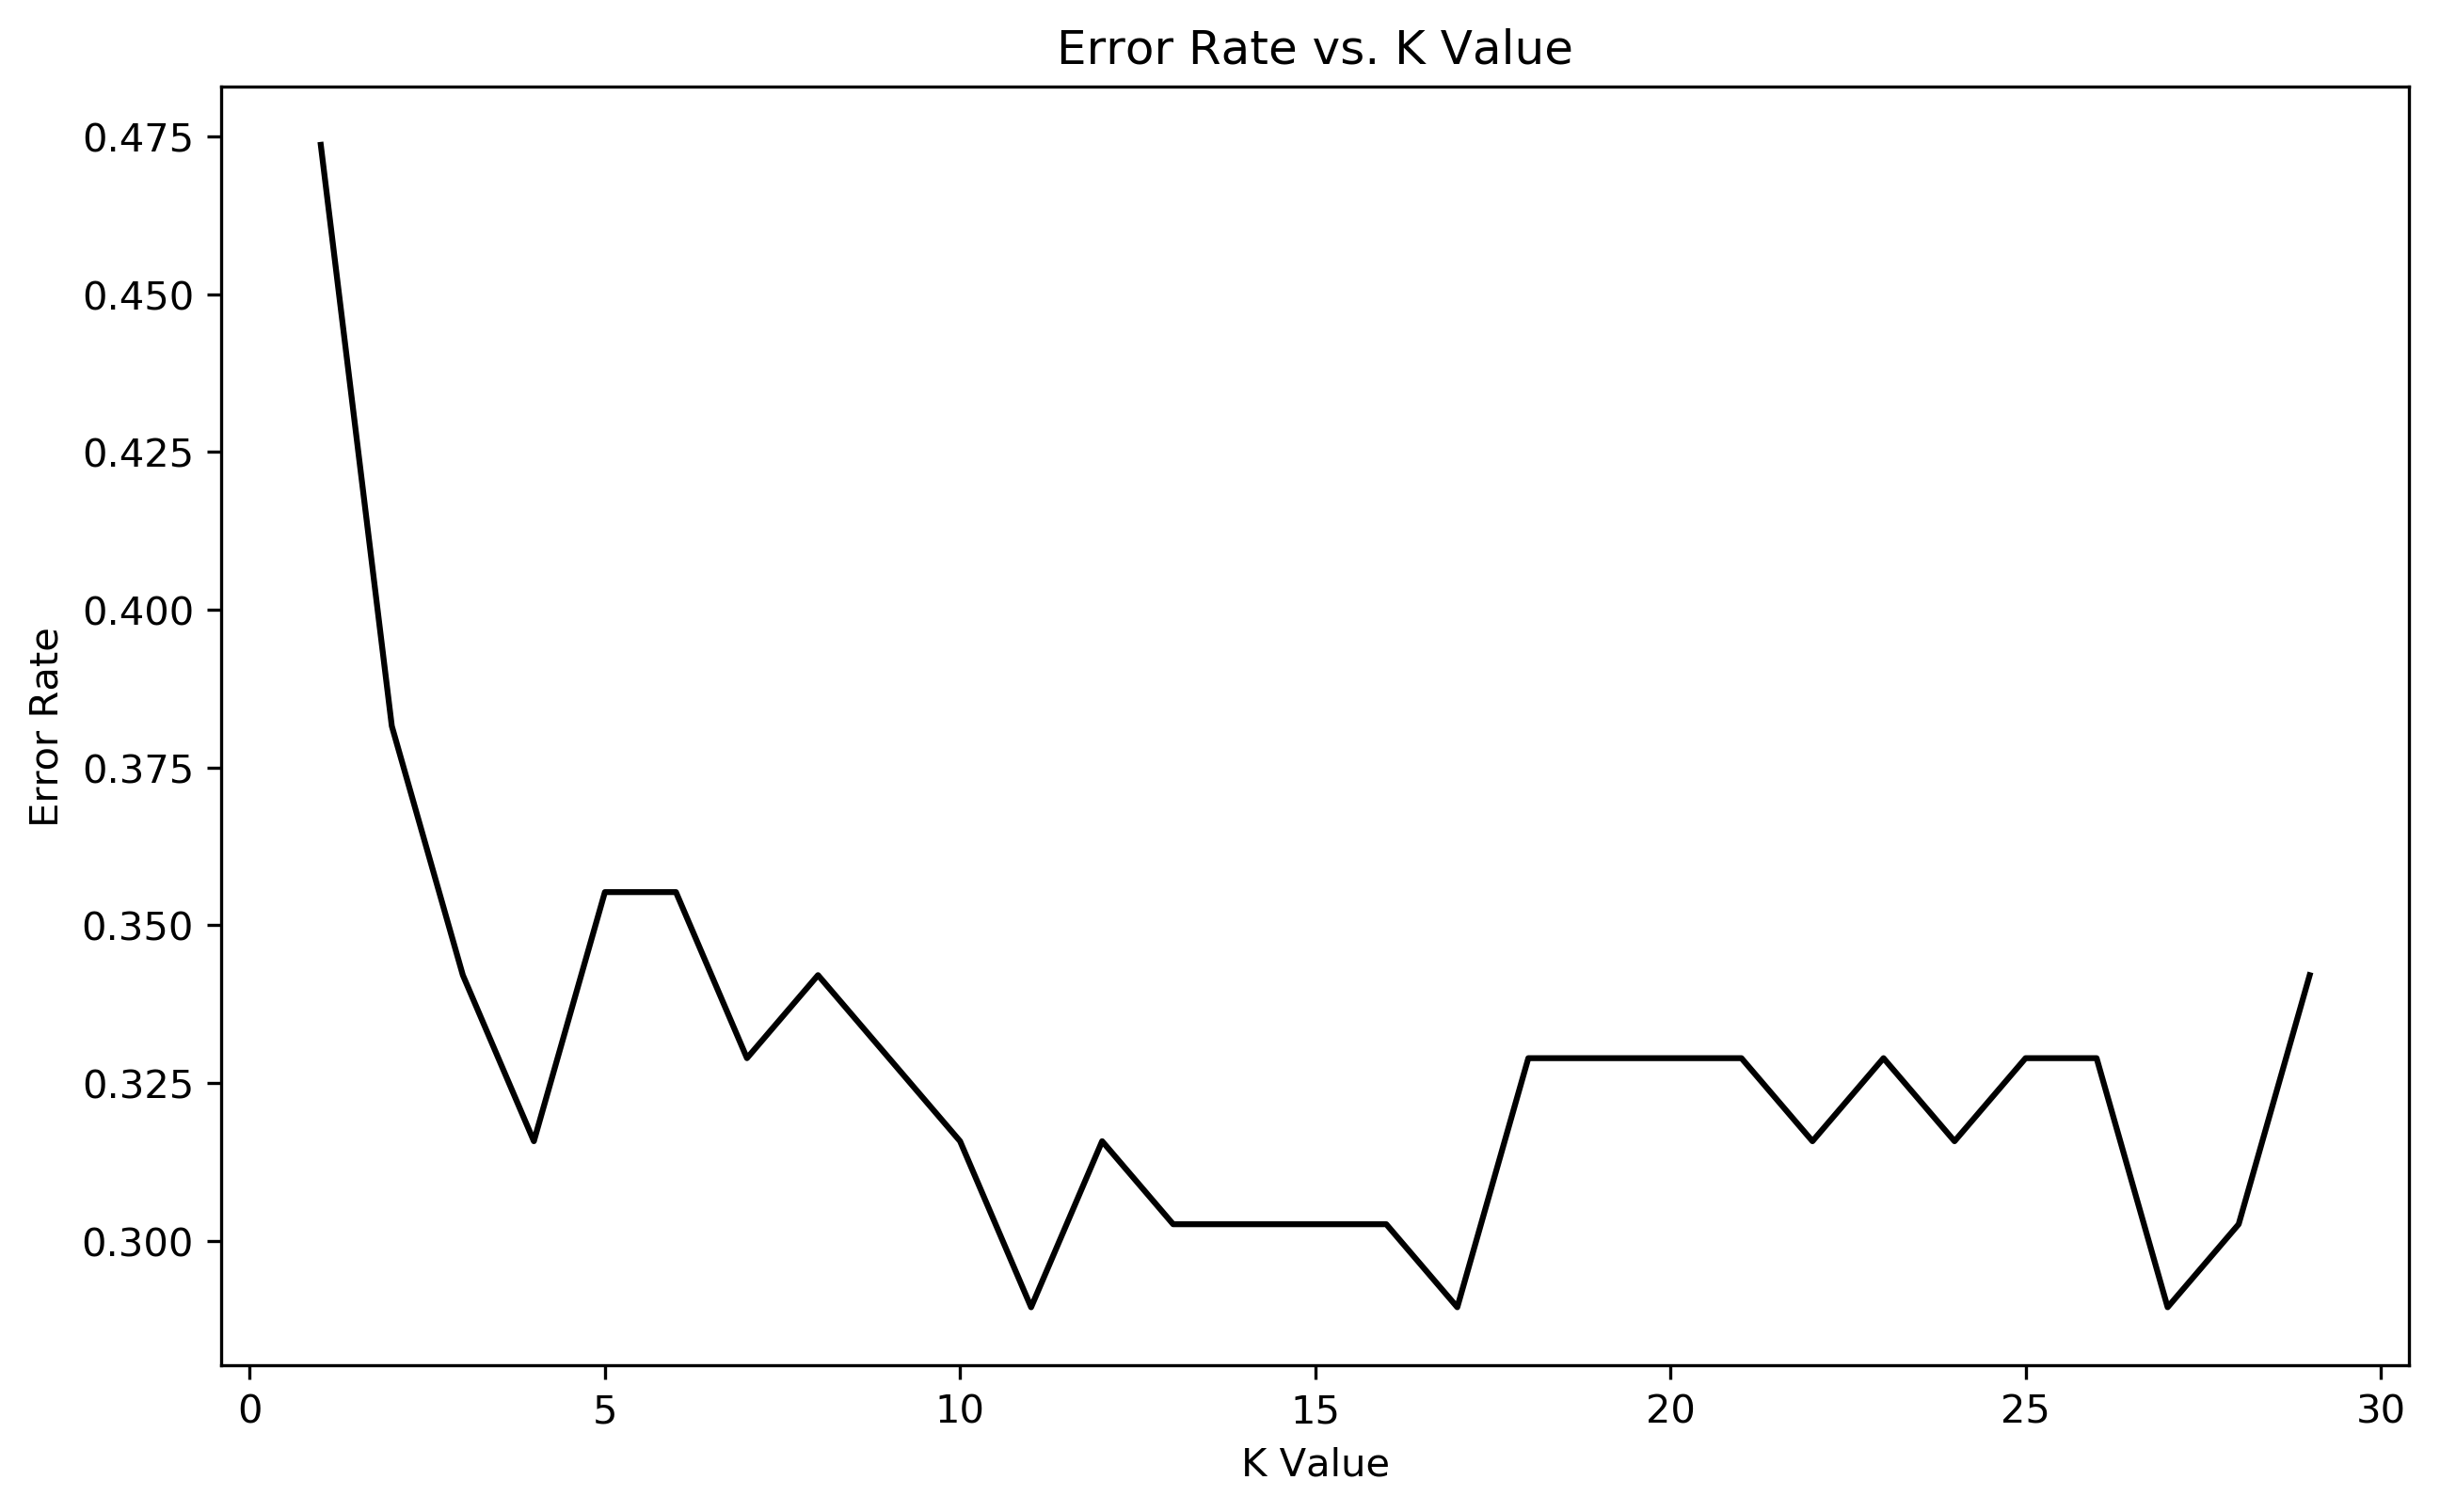

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='black')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=11
from sklearn.metrics import confusion_matrix, classification_report
print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=11


[[20 13]
 [ 9 34]]


              precision    recall  f1-score   support

           0       0.69      0.61      0.65        33
           1       0.72      0.79      0.76        43

    accuracy                           0.71        76
   macro avg       0.71      0.70      0.70        76
weighted avg       0.71      0.71      0.71        76



## Data Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.25, random_state = 0)

Text(0, 0.5, 'Error Rate')

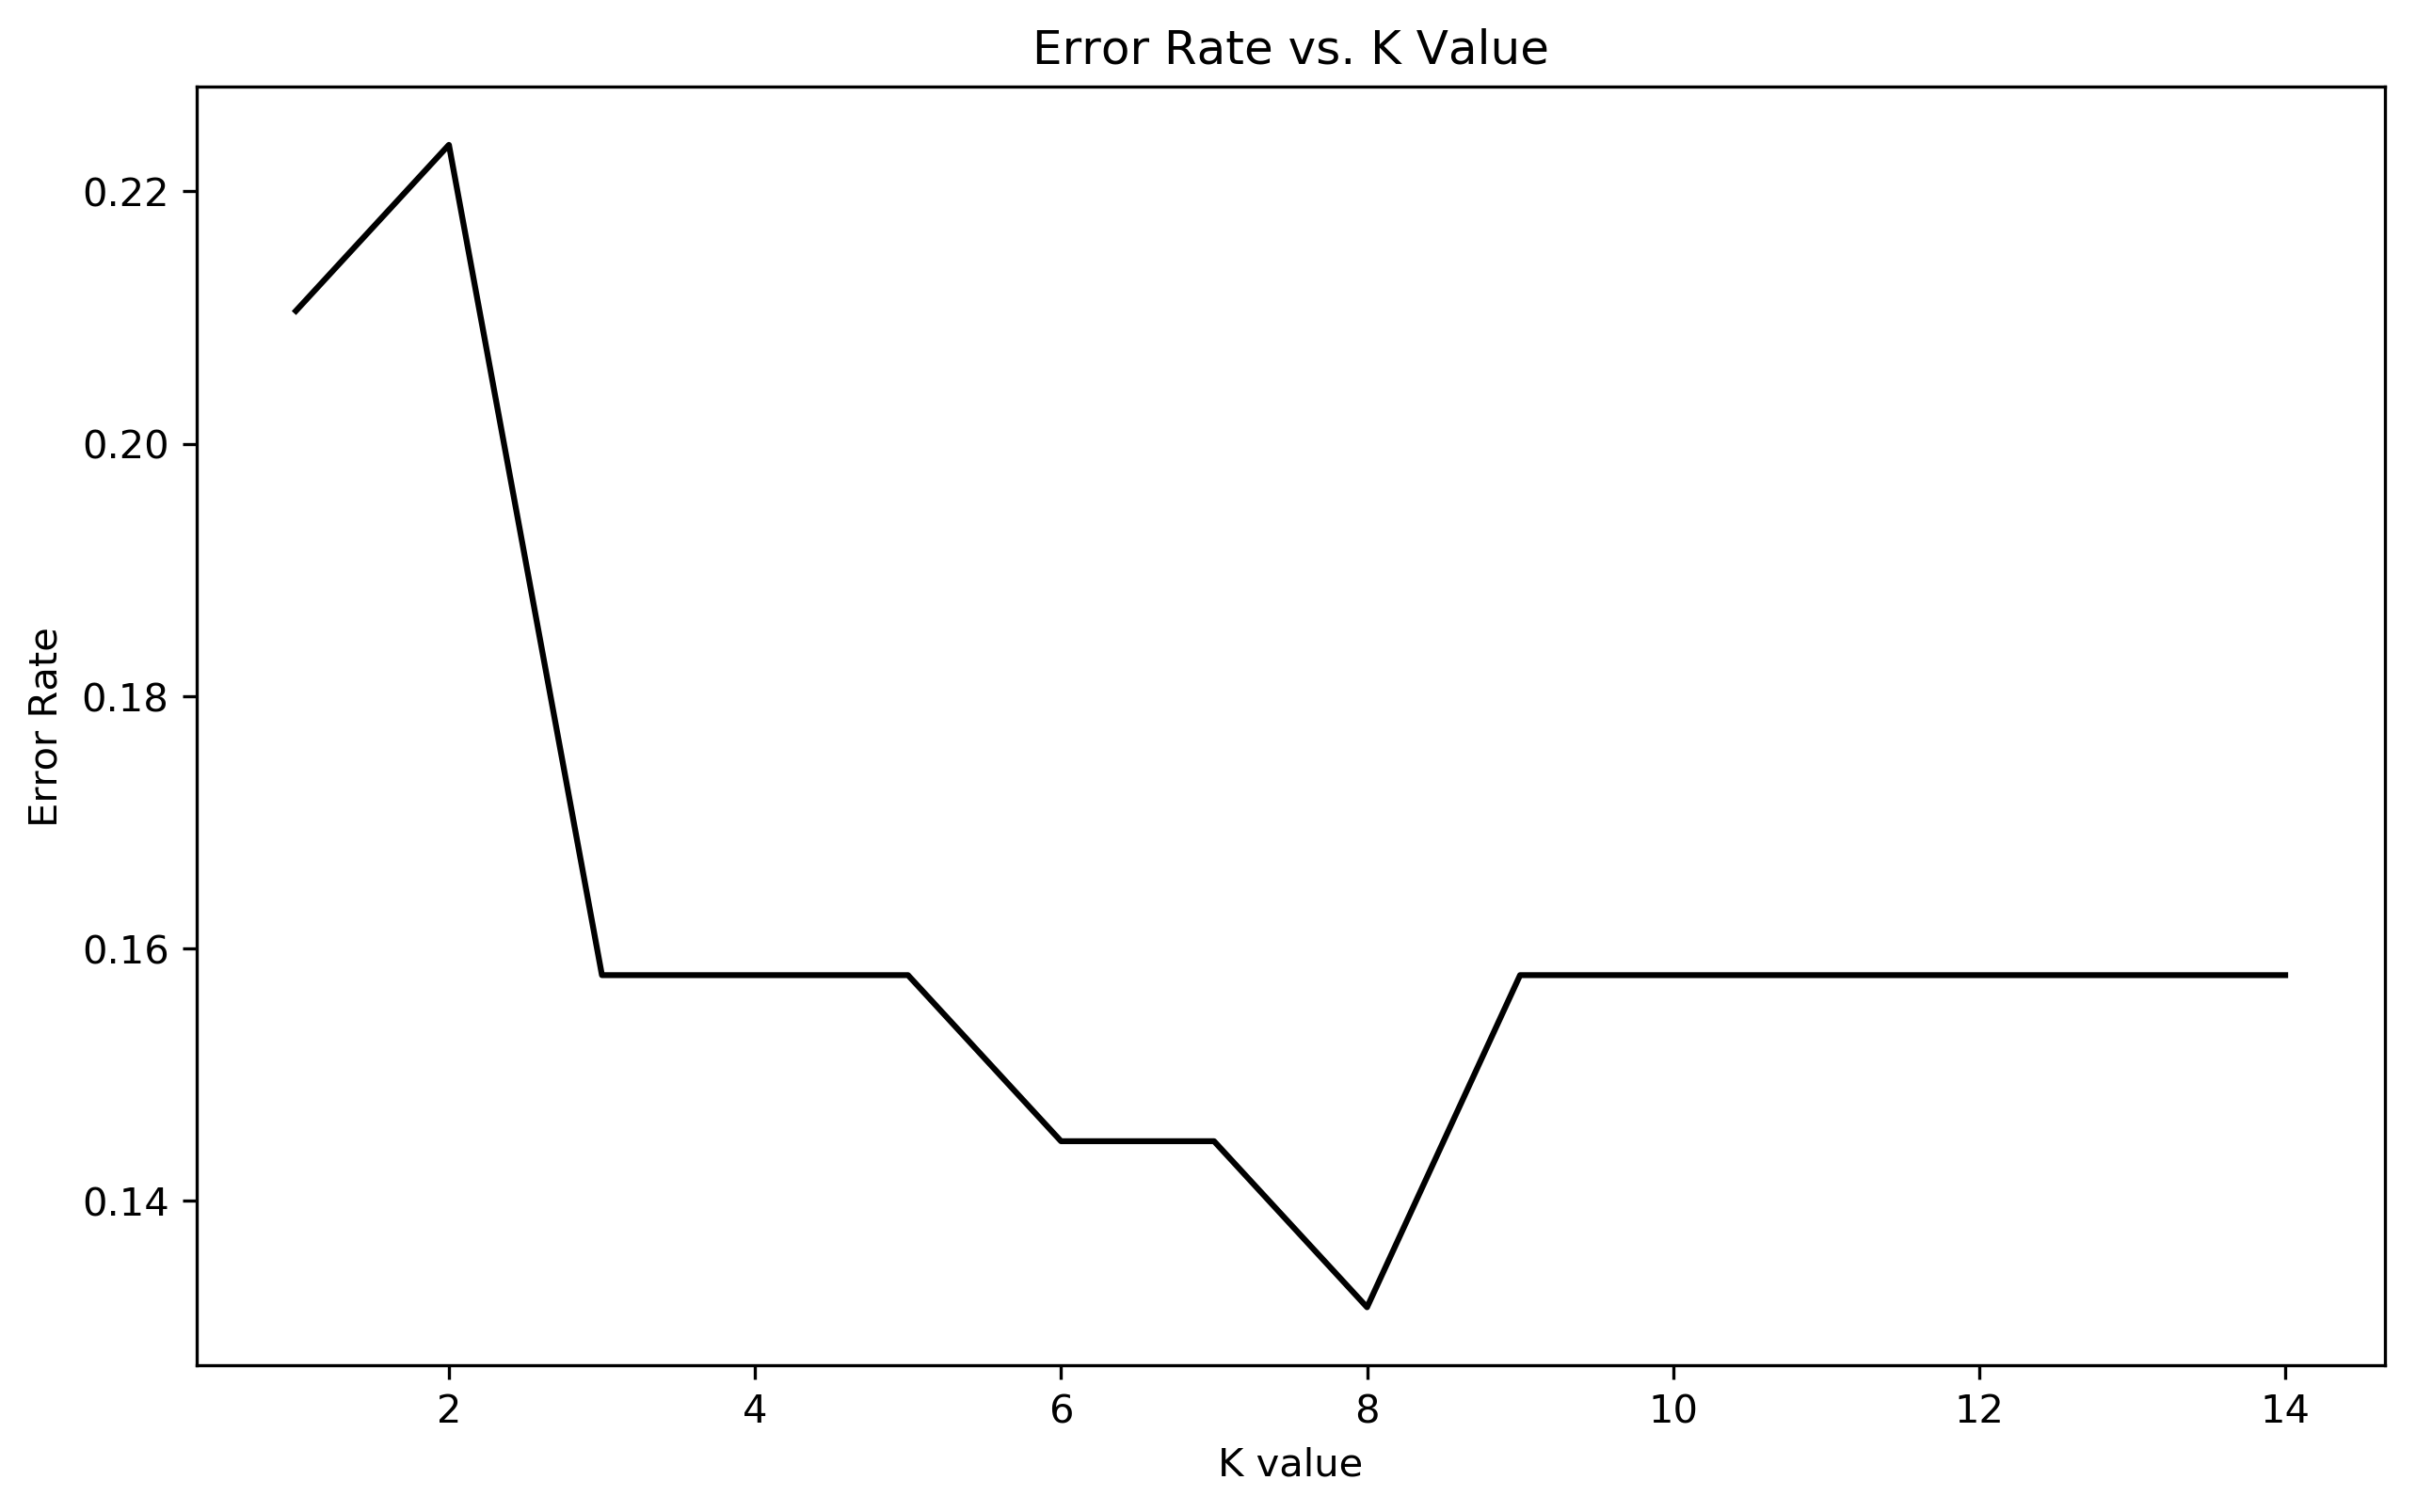

In [14]:
error_rate = []

# Will take some time
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='black')
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=8
from sklearn.metrics import confusion_matrix, classification_report
print('WITH K=8')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=8


[[27  6]
 [ 4 39]]


              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.87      0.91      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



## Predicting New Values

In [16]:
dataset.iloc[2,:]

age          41.0
sex           0.0
cp            1.0
trestbps    130.0
chol        204.0
fbs           0.0
restecg       0.0
thalach     172.0
exang         0.0
oldpeak       1.4
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 2, dtype: float64

In [17]:
new_data=dataset.iloc[2,:-1].values
classifier.predict(sc.transform([new_data]))

array([1], dtype=int64)

In [18]:
classifier.predict_proba(sc.transform([new_data]))

array([[0., 1.]])

## Case study: Liver diease prediction

In [45]:
dataset = pd.read_csv('indian_liver_patient.csv')
dataset.head().T

0     1     2     3     4
Age                             65    62    62    58    72
Gender                      Female  Male  Male  Male  Male
Total_Bilirubin                0.7  10.9   7.3     1   3.9
Direct_Bilirubin               0.1   5.5   4.1   0.4     2
Alkaline_Phosphotase           187   699   490   182   195
Alamine_Aminotransferase        16    64    60    14    27
Aspartate_Aminotransferase      18   100    68    20    59
Total_Protiens                 6.8   7.5     7   6.8   7.3
Albumin                        3.3   3.2   3.3   3.4   2.4
Albumin_and_Globulin_Ratio     0.9  0.74  0.89     1   0.4
Dataset                          1     1     1     1     1

In [47]:
dataset = dataset.rename({'Dataset':'Target'},axis=1)
dataset['Target'].value_counts()

1    416
2    167
Name: Target, dtype: int64

In [49]:
dataset['Gender'] = dataset['Gender'].map({'Female':0,'Male':1})

In [50]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

## Imputing Missing values

### Simple imputer

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
non_nan_data = imputer.fit_transform(dataset)
dataset = pd.DataFrame(non_nan_data,columns = dataset.columns)
dataset.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

### KNN imputer

In [52]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
non_nan_data = imputer.fit_transform(dataset)
dataset = pd.DataFrame(non_nan_data,columns = dataset.columns)
dataset.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [53]:
dataset.describe().T

count        mean         std   min    25%  \
Age                         583.0   44.746141   16.189833   4.0   33.0   
Gender                      583.0    0.756432    0.429603   0.0    1.0   
Total_Bilirubin             583.0    3.298799    6.209522   0.4    0.8   
Direct_Bilirubin            583.0    1.486106    2.808498   0.1    0.2   
Alkaline_Phosphotase        583.0  290.576329  242.937989  63.0  175.5   
Alamine_Aminotransferase    583.0   80.713551  182.620356  10.0   23.0   
Aspartate_Aminotransferase  583.0  109.910806  288.918529  10.0   25.0   
Total_Protiens              583.0    6.483190    1.085451   2.7    5.8   
Albumin                     583.0    3.141852    0.795519   0.9    2.6   
Albumin_and_Globulin_Ratio  583.0    0.947064    0.318492   0.3    0.7   
Target                      583.0    1.286449    0.452490   1.0    1.0   

                                   50%    75%     max  
Age                          45.000000   58.0    90.0  
Gender                        1.000000    1.0     1.0  
Total_Bilirubin               1.000000    2.6    75.0  
Direct_Bilirubin              0.300000    1.3    19.7  
Alkaline_Phosphotase        208.000000  298.0  2110.0  
Alamine_Aminotransferase     35.000000   60.5  2000.0  
Aspartate_Aminotransferase   42.000000   87.0  4929.0  
Total_Protiens                6.600000    7.2     9.6  
Albumin                       3.100000    3.8     5.5  
Albumin_and_Globulin_Ratio    0.947064    1.1     2.8  
Target                        1.000000    2.0     2.0

In [57]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

## Data Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Choosing a K Value

Text(0, 0.5, 'Error Rate')

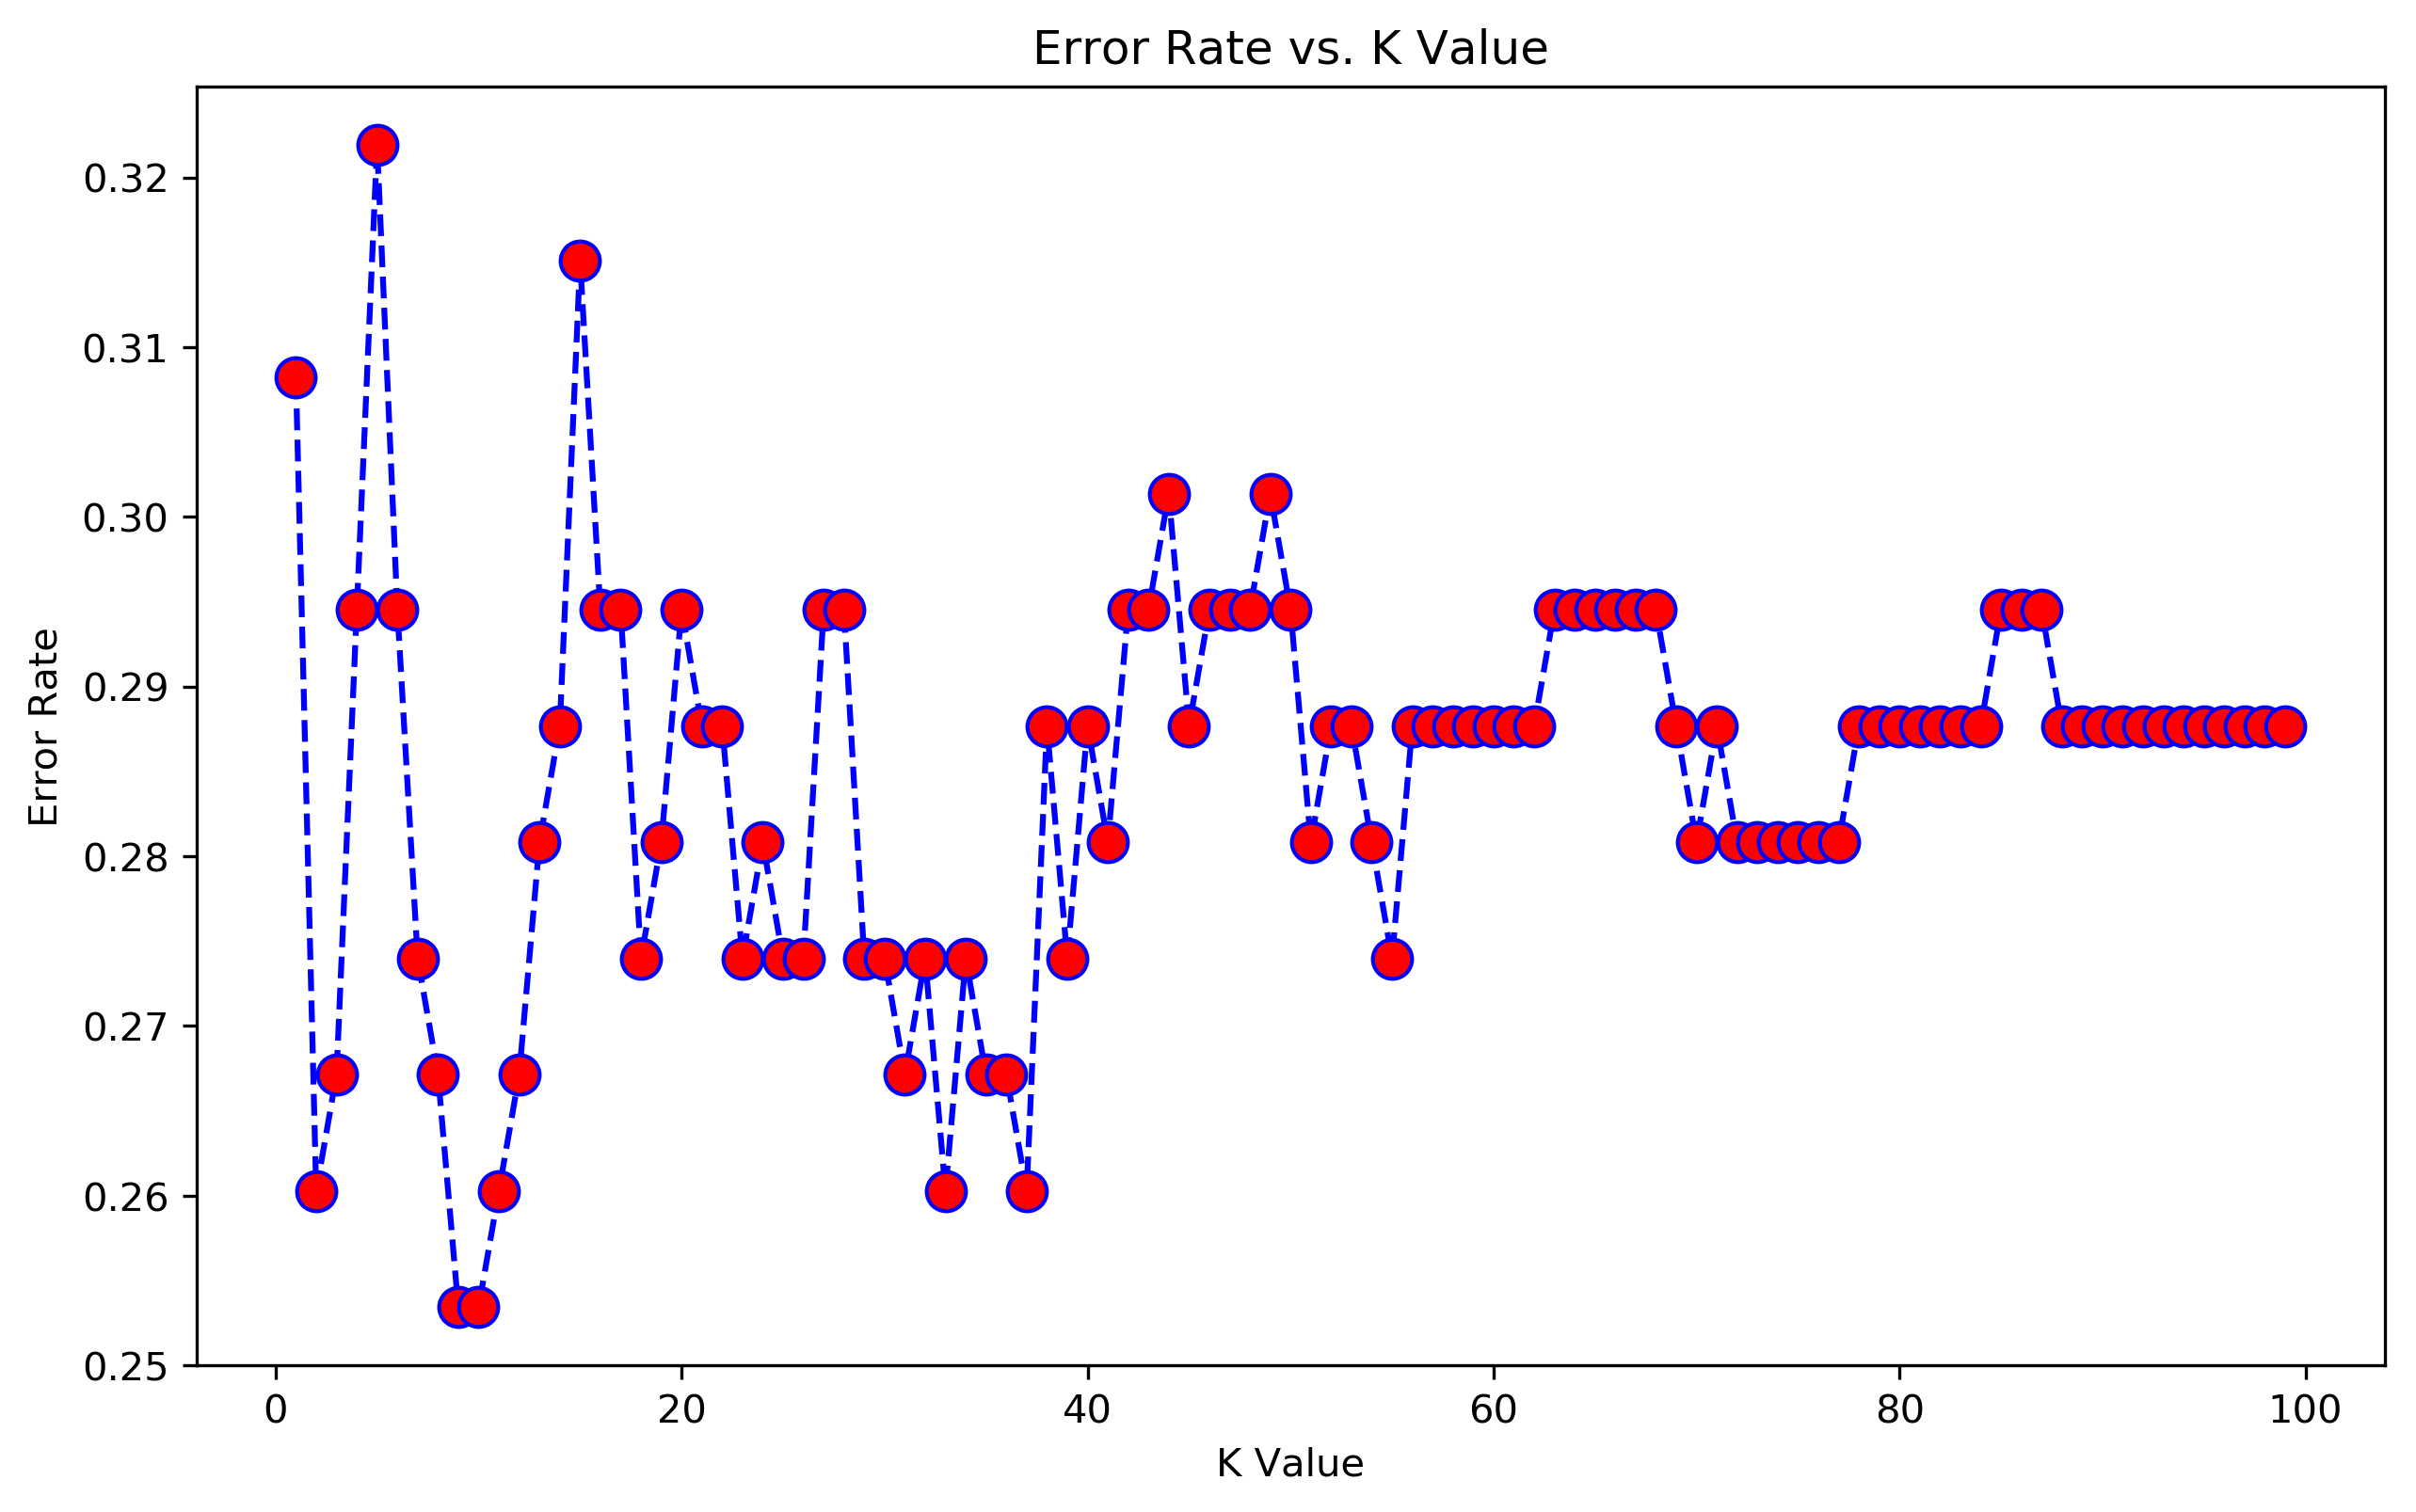

In [63]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=10
from sklearn.metrics import confusion_matrix, classification_report
print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=9


[[93 11]
 [26 16]]


              precision    recall  f1-score   support

         1.0       0.78      0.89      0.83       104
         2.0       0.59      0.38      0.46        42

    accuracy                           0.75       146
   macro avg       0.69      0.64      0.65       146
weighted avg       0.73      0.75      0.73       146



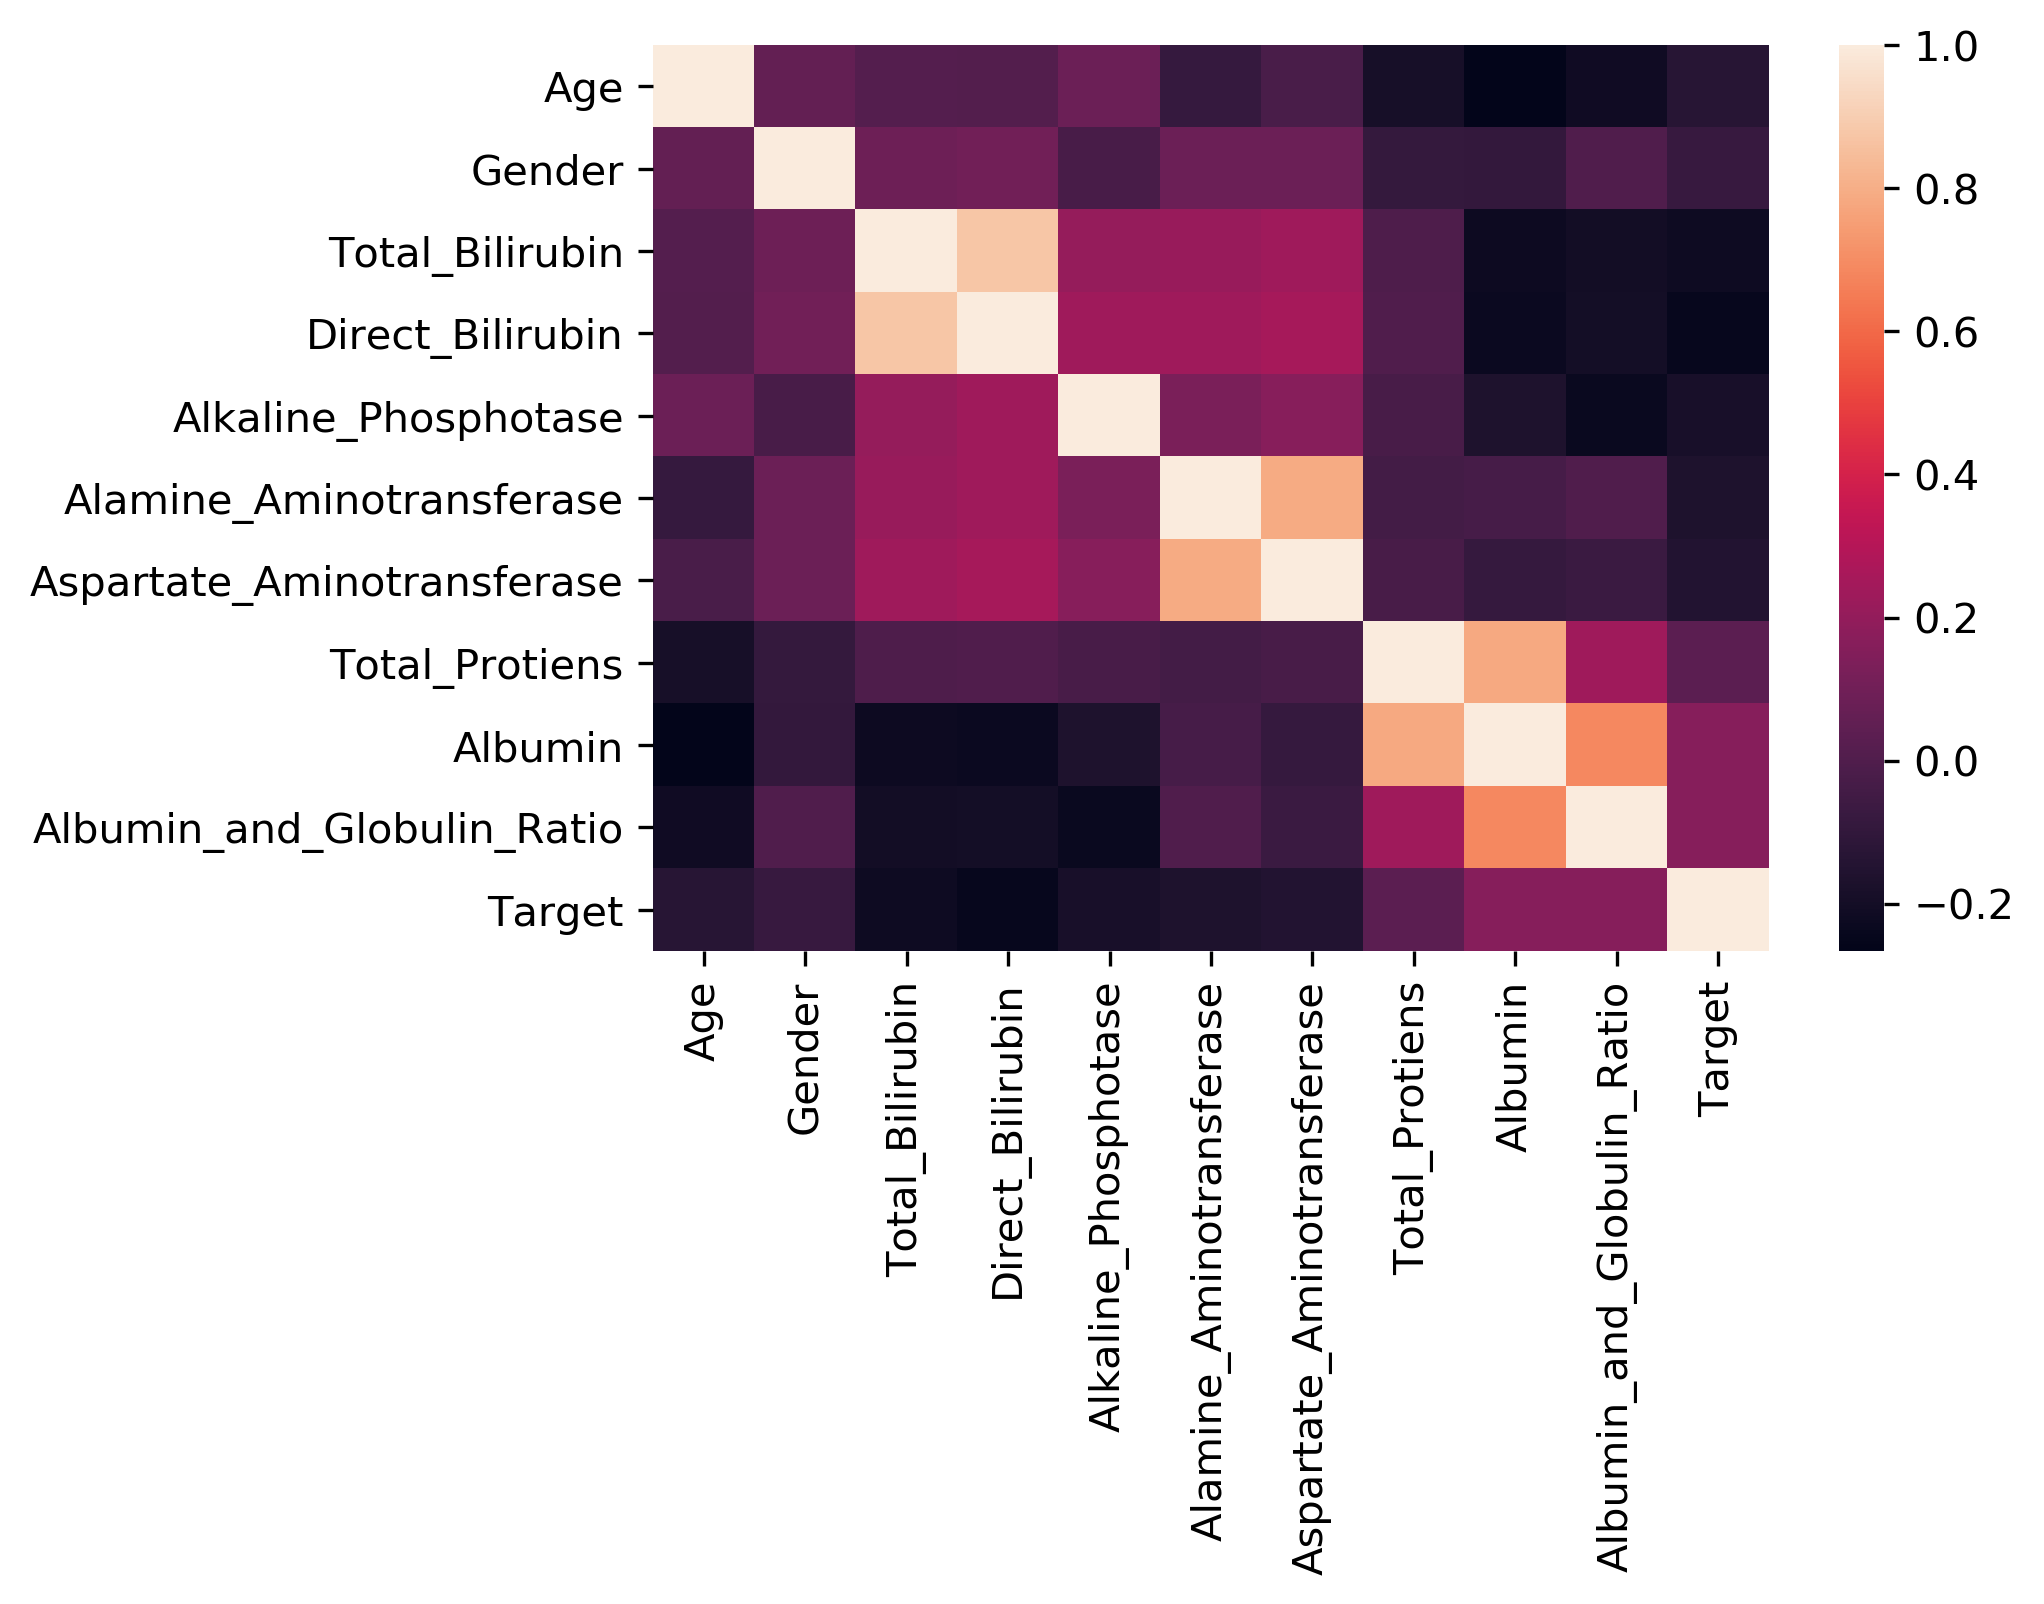

In [34]:
sns.heatmap(dataset.corr())

## Exercise

1.	What is the intuition behind k-nearest neighbor algorithm.
2.	How the value of ‘k’ affects the performance of this algorithm?
3.	How the value of ‘k’ optimized?
4.	What are the ways to deal with missing attributes of a dataset?
5.	How can KNN be applied for imputing missing data in a dataset?
6.	Apply the KNN algorithm to the breast cancer data set used in the previous chapter.
